<table align="center">
  <td align="center"><a target="_blank" href="http://introtodeeplearning.com">
        <img src="http://introtodeeplearning.com/images/colab/mit.png" style="padding-bottom:5px;" />
      Visit MIT Deep Learning</a></td>
  <td align="center"><a target="_blank" href="https://colab.research.google.com/github/aamini/introtodeeplearning_labs/blob/master/lab2/Part1_mnist_solution.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/aamini/introtodeeplearning_labs/blob/master/lab2/Part1_mnist_solution.ipynb">
        <img src="http://introtodeeplearning.com/images/colab/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


# Laboratory 2: Computer Vision

# Part 1: MNIST Digit Classification

In the first portion of this lab, we will build and train a convolutional neural network (CNN) for classification of handwritten digits from the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The MNIST dataset consists of 60,000 training images and 10,000 test images. Our classes are the digits 0-9.

First we'll import TensorFlow, enable Eager execution, and also import some dependencies.

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np
import random

import util

## 1.1 MNIST dataset 

Let's download and load the dataset and display a few random samples from it:

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = np.expand_dims(train_images, axis=-1)/255.
train_labels = np.int64(train_labels)
test_images = np.expand_dims(test_images, axis=-1)/255.
test_labels = np.int64(test_labels)

Our training set is made up of 28x28 grayscale images of handwritten digits. 

Let's visualize what some of these images and their corresponding training labels look like.

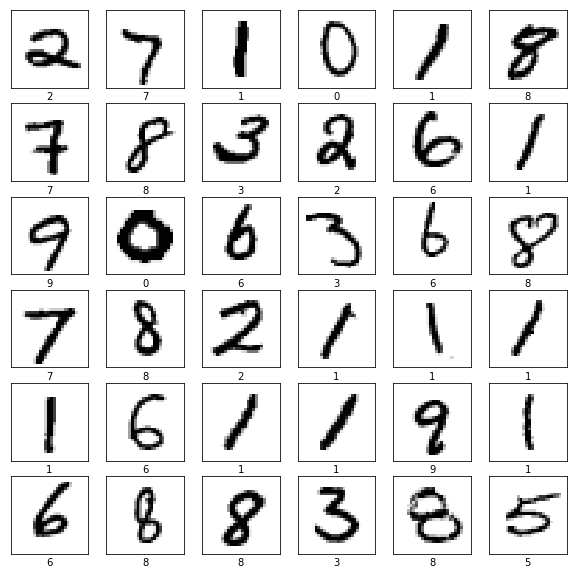

In [3]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

## 1.2 Neural Network for Handwritten Digit Classification

We'll first build a simple neural network consisting of two fully connected layers and apply this to the digit classification task. Our network will ultimately output a probability distribution over the 10 digit classes (0-9). This first architecture we will be building is depicted below:

![alt_text](img/mnist_2layers_arch.png "CNN Architecture for MNIST Classification")


### Fully connected neural network architecture
To define the architecture of this first fully connected neural network, we'll once again use the Keras API and define the model using the [`Sequential`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential) class. Note how we first use a [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) layer, which flattens the input so that it can be fed into the model. 

In this next block, you'll define the output layer -- the second fully connected of this simple network.

In [4]:
def build_fc_model():
  fc_model = tf.keras.Sequential([
      # First define a Flatten layer
      tf.keras.layers.Flatten(),
      # '''TODO: Define the activation function for the first fully connected layer.'''
      tf.keras.layers.Dense(128, activation=tf.nn.relu), # TODO (activation)
      # '''TODO: Define the second Dense layer to output the classification probabilities'''
      tf.keras.layers.Dense(10, activation=tf.nn.softmax) # TODO (both dimension and activation)
  ])
  return fc_model

model = build_fc_model()

As we progress through this next portion, you may find that you'll want to make changes to the architecture defined above. **Note that in order to update the model later on, you'll need to re-run the above cell to re-initialize the model. **

Let's take a step back and think about the network we've just created. The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (28 x 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. You can think of this layer as unstacking rows of pixels in the image and lining them up. There are no learned parameters in this layer; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are fully-connected neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer (which you've defined!) should return an array of probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the handwritten digit classes.

That defines our fully connected model! 



### Compile the model

Before training the model, we need to define a few more settings. These are added during the model's [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#compile) step:

* *Loss function* — This defines how we measure how accurate the model is during training. As was covered in lecture, during training we want to minimize this function, which will "steer" the model in the right direction.
* *Optimizer* — This defines how the model is updated based on the data it sees and its loss function.
* *Metrics* — Here we can define metrics used to monitor the training and testing steps. In this example, we'll look at the *accuracy*, the fraction of the images that are correctly classified.

We'll start out by using a stochastic gradient descent (SGD) optimizer initialized with a learning rate of 0.1. Since we are performing a categorical classification task, we'll want to use the [cross entropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/sparse_categorical_crossentropy).

You'll want to experiment with both the choice of optimizer and learning rate and evaluate how these affect the accuracy of the trained model. 

In [5]:
'''TODO: Experiment with different optimizers and learning rates. How do these affect
    the accuracy of the trained model? Which optimizers and/or learning rates yield
    the best performance?'''
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

We're now ready to train our model, which will involve feeding the training data (`train_images` and `train_labels`) into the model, and then asking it to learn the associations between images and labels. We'll also need to define the batch size and the number of epochs, or iterations over the MNIST dataset, to use during training. With the Keras API and defining the model settings in the `compile` step, training is all accomplished by calling the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) method on an instance of the Model class. 


In [6]:
# Define the batch size and the number of epochs to use during training
BATCH_SIZE = 64
EPOCHS = 5

In [7]:
model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3704 - acc: 0.8972
Epoch 2/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1959 - acc: 0.9447
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1475 - acc: 0.9578
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1195 - acc: 0.9665
Epoch 5/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1012 - acc: 0.9719


As the model trains, the loss and accuracy metrics are displayed. With five epochs and a learning rate of 0.01, this fully connected model should achieve an accuracy of approximatley 0.97 (or 97%) on the training data.

### Evaluate accuracy on the test dataset

Now that we've trained the model, we can ask it to make predictions about a test set that it hasn't seen before. In this example, the `test_images` array comprises our test dataset. To evaluate accuracy, we can check to see if the model's predictions match the labels from the `test_labels` array. 

Use the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method to evaluate the model on the test dataset!

In [8]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = model.evaluate(test_images, test_labels) # TODO

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 134us/sample - loss: 0.1061 - acc: 0.9676
Test accuracy: 0.9676


You may observe that the accuracy on the test dataset is a little lower than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*, when a machine learning model performs worse on new data than on its training data. 

What is the highest accuracy you can achieve with this first fully connected model? Since the handwritten digit classification task is pretty straightforward, you may be wondering how we can do better...

![Deeper...](https://i.kym-cdn.com/photos/images/newsfeed/000/534/153/f87.jpg)

## 1.3 Convolutional Neural Network (CNN) for handwritten digit classification

As we saw in lecture, convolutional neural networks (CNNs) are particularly well-suited for a variety of tasks in computer vision, and have achieved near-perfect accuracies on the MNIST dataset. We will now build a CNN composed of two convolutional layers and pooling layers, followed by two fully connected layers, and ultimately output a probability distribution over the 10 digit classes (0-9). The CNN we will be building is depicted below:

![alt_text](img/convnet_fig.png "CNN Architecture for MNIST Classification")

### Define the CNN model

We'll use the same training and test datasets as before, and proceed similarly as our fully connected network to define and train our new CNN model. 

You can use  [`keras.layers.Conv2D` ](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) to define convolutional layers and [`keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) to define the pooling layers. Use the parameters shown in the network architecture above to define these layers and build the CNN model!

In [9]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation=tf.nn.relu), # TODO        

        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # TODO

        #'''TODO: Define the second convolutional layer'''
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu), # TODO

        #'''TODO: Define the second max pooling layer'''
        tf.keras.layers.MaxPool2D(pool_size=(2,2)), # TODO

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        #'''TODO: Define the last Dense layer'''
        tf.keras.layers.Dense(10, activation=tf.nn.softmax) # TODO
    ])
    return cnn_model
  
cnn_model = build_cnn_model()
print(cnn_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 36)        7812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               115328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total para

### Train and test the CNN model

Now, as before, we can define the loss function, optimizer, and metrics through the `compile` method. Compile the CNN model with an optimizer and learning rate of choice:

In [10]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-1), # TODO
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Now we can train our model using the `fit` method via the Keras API:

In [11]:
'''TODO: Train the CNN model'''
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/5
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.2573 - acc: 0.9192
Epoch 2/5
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0734 - acc: 0.9782
Epoch 3/5
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0518 - acc: 0.9843
Epoch 4/5
60000/60000 [==============================] - 92s 2ms/sample - loss: 0.0402 - acc: 0.9876
Epoch 5/5
60000/60000 [==============================] - 91s 2ms/sample - loss: 0.0327 - acc: 0.9895


Great! Now that we've trained the model, let's evaluate it on the test dataset using the [`evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#evaluate) method:

In [12]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels) # TODO

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 7s 655us/sample - loss: 0.0519 - acc: 0.9832
Test accuracy: 0.9832


What is the highest accuracy you're able to achieve using the CNN model, and how does the accuracy of the CNN model compare to the accuracy of the simple fully connected network? What optimizers and learning rates seem to be optimal for training the CNN model? 

### Make predictions with the CNN model

With the model trained, we can use it to make predictions about some images. We'll use the [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#predict) function call to generate the output predictions given a set of input samples.


In [13]:
predictions = cnn_model.predict(test_images)

With this function call, the model has predicted the label for each image in the testing set. Let's take a look at the prediction for the first image in the test dataset:

In [14]:
predictions[0]

array([1.6087186e-09, 2.2375279e-08, 3.4120051e-06, 1.8204476e-06,
       4.8821411e-12, 3.7162760e-09, 2.7892180e-13, 9.9998438e-01,
       2.1472646e-10, 1.0327722e-05], dtype=float32)

As you can see, a prediction is an array of 10 numbers. Recall that the output of our model is a probability distribution over the 10 digit classes. Thus, these numbers describe the model's "confidence" that the image corresponds to each of the 10 different digits. 

Let's look at the digit that has the highest confidence for the first image in the test dataset:

In [15]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset'''
np.argmax(predictions[0]) # TODO

7

So, the model is most confident that this image is a "7". We can check the test label (remember, this is the true identity of the digit) to see if this prediction is correct:

In [16]:
test_labels[0]

7

It is!

We can define a couple of functions to help visualize the classification results on the MNIST dataset. First, we'll write a function, `plot_image`, to plot images along with their predicted label and the probability of the prediction. Second, we'll also define a function, `plot_value_array`, to plot the prediction probabilities for each of the digits. 

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(np.squeeze(img), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's use these functions to visualize the model's predictions for the images in the test dataset: 

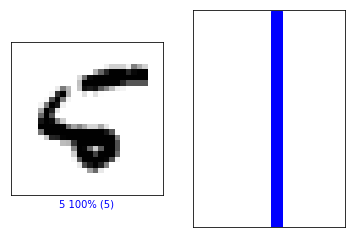

In [18]:
#@title Change the slider to look at the model's predictions! { run: "auto" }

image_index = 8 #@param {type:"slider", min:0, max:100, step:1}
plt.subplot(1,2,1)
plot_image(image_index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_index, predictions,  test_labels)

We can also plot several images along with their predictions, where correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent confidence (out of 100) for the predicted label. Note the model can be very confident in an incorrect prediction!

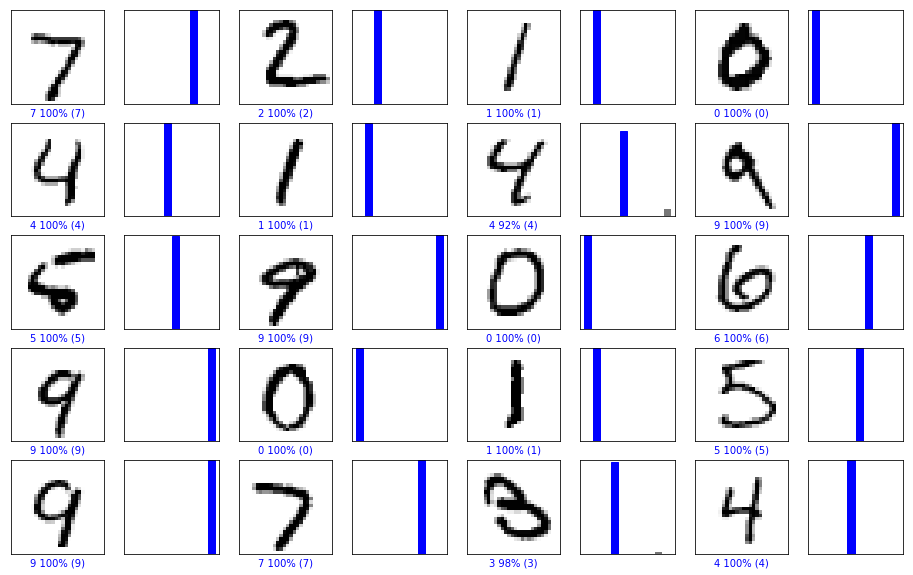

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## 1.4 Training the model 2.0

Earlier in the lab, we used the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential#fit) function call to train the model. This function is quite high-level and intuitive, which is really useful for simpler models. As you may be able to tell, this function abstracts away many details in the training call, and we have less control over training model, which could be useful in other contexts. 

As an alternative to this, we can use the [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape) class to record differentiation operations during training, and then call the [`tf.GradientTape.gradient`](https://www.tensorflow.org/api_docs/python/tf/GradientTape#gradient) function to actually compute the gradients. 

You may recall seeing this in Lab 1 Part 1, but let's take another look at this here.

We'll use this framework to train our `cnn_model` using stochastic gradient descent.

In [20]:
# Rebuild the CNN model
cnn_model = build_cnn_model()

batch_size = 12
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2) # define our optimizer

for idx in range(0, train_images.shape[0],batch_size):
  print("id:", idx);
  # First grab a batch of training data and convert the input images to tensors
  (images, labels) = (train_images[idx:idx+batch_size], train_labels[idx:idx+batch_size])
  images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
  with tf.GradientTape() as tape:
    logits = cnn_model(images) # feed the images into the model
    loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits) # value of the loss

  print(loss_value.numpy().mean()) # Print loss

  # Backpropagation
  grads = tape.gradient(loss_value, cnn_model.variables)
  optimizer.apply_gradients(zip(grads, cnn_model.variables),
                            global_step=tf.train.get_or_create_global_step())

id: 0
2.3087056
id: 12
2.2729917
id: 24
2.2843525
id: 36
2.3032432
id: 48
2.2426875
id: 60
2.2196002
id: 72
2.1930187
id: 84
2.1268523
id: 96
2.1807392
id: 108
2.135218
id: 120
2.0814435
id: 132
2.2827885
id: 144
2.1810806
id: 156
2.008943
id: 168
2.1630661
id: 180
2.0700493
id: 192
2.0551312
id: 204
1.6385741
id: 216
2.179828
id: 228
1.955224
id: 240
1.7706095
id: 252
1.8443037
id: 264
1.9786525
id: 276
1.4869056
id: 288
1.4422861
id: 300
1.6287395
id: 312
1.8199173
id: 324
1.4838668
id: 336
1.2487414
id: 348
1.1137974
id: 360
1.7075173
id: 372
1.0327655
id: 384
1.3932511
id: 396
1.4712124
id: 408
1.2200745
id: 420
1.0961314
id: 432
1.1593121
id: 444
0.74836516
id: 456
0.5986553
id: 468
0.8105464
id: 480
1.3367739
id: 492
2.8169394
id: 504
1.398479
id: 516
1.9490801
id: 528
1.667476
id: 540
1.6528081
id: 552
1.0730205
id: 564
0.70721227
id: 576
1.0410724
id: 588
1.0033259
id: 600
1.2134355
id: 612
0.81865835
id: 624
1.340737
id: 636
0.7361637
id: 648
1.062693
id: 660
0.8488057
id: 672

id: 5076
0.043310415
id: 5088
0.010809441
id: 5100
0.10186314
id: 5112
0.11781449
id: 5124
0.2096362
id: 5136
0.1335863
id: 5148
0.43427542
id: 5160
0.27823138
id: 5172
0.73224306
id: 5184
0.57484883
id: 5196
0.07779076
id: 5208
0.13424793
id: 5220
0.05928867
id: 5232
0.023816021
id: 5244
0.035054546
id: 5256
0.07830814
id: 5268
0.06895032
id: 5280
0.021330731
id: 5292
0.71530074
id: 5304
0.1917057
id: 5316
0.021816289
id: 5328
1.1369389
id: 5340
0.08032963
id: 5352
0.11025608
id: 5364
0.31593004
id: 5376
0.035527695
id: 5388
0.29855454
id: 5400
0.14080589
id: 5412
0.11692635
id: 5424
0.36221728
id: 5436
0.04373956
id: 5448
0.14062183
id: 5460
0.15525149
id: 5472
0.18200938
id: 5484
0.02023744
id: 5496
0.05654369
id: 5508
0.08447009
id: 5520
0.011309099
id: 5532
0.5714541
id: 5544
0.4412881
id: 5556
0.18863946
id: 5568
0.046779677
id: 5580
0.051705476
id: 5592
0.37150645
id: 5604
0.06866369
id: 5616
0.0967359
id: 5628
0.32729283
id: 5640
0.14903115
id: 5652
0.09915606
id: 5664
0.017389

id: 9960
0.018831016
id: 9972
0.07842102
id: 9984
0.04646729
id: 9996
0.03556127
id: 10008
0.036109984
id: 10020
0.02510223
id: 10032
0.07182812
id: 10044
0.48517907
id: 10056
0.58952814
id: 10068
0.042633634
id: 10080
0.23264962
id: 10092
0.009461469
id: 10104
0.21715808
id: 10116
0.48545465
id: 10128
0.05773175
id: 10140
0.1507373
id: 10152
0.2845902
id: 10164
0.12729768
id: 10176
0.16794659
id: 10188
0.058860462
id: 10200
1.082373
id: 10212
0.43696573
id: 10224
0.057141718
id: 10236
0.19782017
id: 10248
0.332671
id: 10260
0.054855388
id: 10272
0.25696447
id: 10284
0.043059226
id: 10296
0.0041805715
id: 10308
0.069360346
id: 10320
0.0035114104
id: 10332
0.0105631435
id: 10344
0.002680745
id: 10356
0.2661571
id: 10368
0.0065732715
id: 10380
0.029004494
id: 10392
0.0038040942
id: 10404
0.042703
id: 10416
0.024393499
id: 10428
0.15883557
id: 10440
0.17760903
id: 10452
0.0030461587
id: 10464
0.066245936
id: 10476
0.036595996
id: 10488
0.016119327
id: 10500
0.0056417584
id: 10512
0.016216

id: 14544
0.044128235
id: 14556
0.0047413926
id: 14568
0.009253457
id: 14580
0.4956672
id: 14592
0.27877834
id: 14604
0.07961273
id: 14616
0.013513052
id: 14628
0.027468013
id: 14640
0.060815077
id: 14652
0.03380122
id: 14664
0.10252819
id: 14676
0.0068811593
id: 14688
0.24555385
id: 14700
0.26542792
id: 14712
0.18811929
id: 14724
0.8458778
id: 14736
0.86177653
id: 14748
0.5993225
id: 14760
0.3233636
id: 14772
0.033727642
id: 14784
0.27298054
id: 14796
0.13793598
id: 14808
0.025618544
id: 14820
0.04173362
id: 14832
0.1116536
id: 14844
0.026976297
id: 14856
0.028872022
id: 14868
0.045581713
id: 14880
0.018241275
id: 14892
0.27394572
id: 14904
0.06156887
id: 14916
0.0073432825
id: 14928
0.009370975
id: 14940
0.0077381996
id: 14952
0.29992
id: 14964
0.17917234
id: 14976
0.024035191
id: 14988
0.012907349
id: 15000
0.008297722
id: 15012
0.003392579
id: 15024
0.00991454
id: 15036
0.0043782177
id: 15048
0.033419017
id: 15060
0.20402901
id: 15072
0.23211645
id: 15084
0.0011750524
id: 15096
0.1

id: 19116
0.51819885
id: 19128
0.030183056
id: 19140
0.06615198
id: 19152
0.23313282
id: 19164
0.013987828
id: 19176
0.0080091525
id: 19188
0.033721823
id: 19200
0.009576559
id: 19212
0.09307716
id: 19224
0.007351453
id: 19236
0.4593726
id: 19248
0.27619773
id: 19260
0.0023004613
id: 19272
0.083135895
id: 19284
0.3348063
id: 19296
0.16651244
id: 19308
0.020744989
id: 19320
0.45564392
id: 19332
0.026802465
id: 19344
0.063894466
id: 19356
0.335593
id: 19368
0.12498212
id: 19380
0.100569315
id: 19392
0.05740865
id: 19404
0.117937736
id: 19416
0.055120323
id: 19428
0.31062776
id: 19440
0.04581152
id: 19452
0.06171969
id: 19464
0.063875206
id: 19476
0.01356792
id: 19488
0.20308651
id: 19500
0.3686479
id: 19512
0.0028047925
id: 19524
0.08433899
id: 19536
0.102718405
id: 19548
0.0009774613
id: 19560
0.12853332
id: 19572
0.23339164
id: 19584
0.08066299
id: 19596
0.0057958434
id: 19608
0.35043952
id: 19620
0.0034060834
id: 19632
0.01587165
id: 19644
0.00078721176
id: 19656
0.05507241
id: 19668


id: 23640
0.030045466
id: 23652
0.004779468
id: 23664
0.07498726
id: 23676
0.0914228
id: 23688
0.25268444
id: 23700
0.08479276
id: 23712
0.21191937
id: 23724
0.1485833
id: 23736
0.00075574935
id: 23748
0.0007742239
id: 23760
0.026711686
id: 23772
0.08194692
id: 23784
0.014247083
id: 23796
0.0045426595
id: 23808
0.014682151
id: 23820
0.39740518
id: 23832
0.000833442
id: 23844
0.006589943
id: 23856
0.05194058
id: 23868
0.348901
id: 23880
0.098597854
id: 23892
0.017512137
id: 23904
0.045549735
id: 23916
0.10984375
id: 23928
0.02210215
id: 23940
0.049388528
id: 23952
0.17478639
id: 23964
0.05676214
id: 23976
0.061246175
id: 23988
0.0025676508
id: 24000
0.031136967
id: 24012
0.0066439942
id: 24024
0.0052127894
id: 24036
0.062452722
id: 24048
0.31529653
id: 24060
0.0110581
id: 24072
0.0037583672
id: 24084
0.0029384466
id: 24096
0.11334484
id: 24108
0.0062635546
id: 24120
0.099904664
id: 24132
0.014347124
id: 24144
0.0061129224
id: 24156
0.46985516
id: 24168
0.007754408
id: 24180
0.008120694


id: 28200
0.00980865
id: 28212
0.0029667115
id: 28224
0.019984396
id: 28236
0.00071152713
id: 28248
0.00034511322
id: 28260
0.010905284
id: 28272
0.034882203
id: 28284
0.017643968
id: 28296
0.022117546
id: 28308
0.0116506
id: 28320
0.00021240638
id: 28332
0.0005979449
id: 28344
0.0018183308
id: 28356
0.17886768
id: 28368
0.32209903
id: 28380
0.029994795
id: 28392
0.13842045
id: 28404
0.04165311
id: 28416
0.114338465
id: 28428
0.00034922615
id: 28440
0.0038663682
id: 28452
0.03705174
id: 28464
0.065816395
id: 28476
0.0004720258
id: 28488
0.014432798
id: 28500
0.023837192
id: 28512
0.08869321
id: 28524
0.0038948169
id: 28536
0.22807206
id: 28548
0.68243283
id: 28560
0.0054674223
id: 28572
0.10111439
id: 28584
0.018039977
id: 28596
0.021743098
id: 28608
0.017137788
id: 28620
0.52390146
id: 28632
0.5297246
id: 28644
0.40586522
id: 28656
0.045464758
id: 28668
0.052796066
id: 28680
0.01963788
id: 28692
0.0033564614
id: 28704
0.4231675
id: 28716
0.01644201
id: 28728
0.017634744
id: 28740
0.01

id: 32724
0.017438656
id: 32736
0.101074494
id: 32748
0.0014387915
id: 32760
0.008125036
id: 32772
0.07207613
id: 32784
0.05120237
id: 32796
0.0004188243
id: 32808
0.1280903
id: 32820
0.054326583
id: 32832
0.0034250428
id: 32844
0.0072167907
id: 32856
0.041895885
id: 32868
0.113157295
id: 32880
0.6730921
id: 32892
0.08603112
id: 32904
0.0048429477
id: 32916
0.032182097
id: 32928
0.0012785591
id: 32940
0.0010614138
id: 32952
0.0015657311
id: 32964
0.0004634511
id: 32976
0.00057748525
id: 32988
0.0034675533
id: 33000
0.0043807733
id: 33012
0.021919006
id: 33024
0.0042397003
id: 33036
0.006005825
id: 33048
0.04931401
id: 33060
0.0831377
id: 33072
0.0006756393
id: 33084
0.0014645035
id: 33096
0.020863786
id: 33108
0.0023041281
id: 33120
0.10618647
id: 33132
0.13559195
id: 33144
0.22994222
id: 33156
0.03048951
id: 33168
0.00051696267
id: 33180
0.075628266
id: 33192
0.02558577
id: 33204
0.003150997
id: 33216
0.014969283
id: 33228
0.00045002752
id: 33240
0.2518004
id: 33252
0.012695395
id: 33

0.021207338
id: 37248
0.007847254
id: 37260
0.0017973498
id: 37272
0.19244881
id: 37284
0.007877372
id: 37296
0.019726055
id: 37308
0.08182128
id: 37320
0.0017206479
id: 37332
0.008137991
id: 37344
0.4824529
id: 37356
0.072642736
id: 37368
0.041798715
id: 37380
0.016209781
id: 37392
0.17007412
id: 37404
0.015501782
id: 37416
0.21485923
id: 37428
0.018230597
id: 37440
0.3048375
id: 37452
0.009178983
id: 37464
0.2920387
id: 37476
0.012460233
id: 37488
0.023902254
id: 37500
0.0059606037
id: 37512
0.03260393
id: 37524
0.005508749
id: 37536
0.05683395
id: 37548
0.089951225
id: 37560
0.00137232
id: 37572
0.012064244
id: 37584
0.03316504
id: 37596
0.121223904
id: 37608
0.0061409394
id: 37620
0.01198241
id: 37632
0.0020880925
id: 37644
0.07323509
id: 37656
0.0020049417
id: 37668
0.0061793625
id: 37680
0.38769475
id: 37692
0.16127653
id: 37704
0.33867037
id: 37716
0.05461863
id: 37728
0.18043244
id: 37740
0.008982978
id: 37752
0.18007463
id: 37764
0.19901757
id: 37776
0.013779435
id: 37788
0.00

0.36002824
id: 41748
0.0019112565
id: 41760
0.09867699
id: 41772
0.0071608946
id: 41784
0.074364625
id: 41796
0.0048586107
id: 41808
0.04934697
id: 41820
0.0027442367
id: 41832
0.2968849
id: 41844
0.0010468047
id: 41856
0.0017086529
id: 41868
0.003268989
id: 41880
0.14638913
id: 41892
0.09553736
id: 41904
0.24910377
id: 41916
0.005247176
id: 41928
0.031223012
id: 41940
0.02720738
id: 41952
0.005375098
id: 41964
0.0029045737
id: 41976
0.0061654127
id: 41988
0.3343661
id: 42000
0.029799588
id: 42012
0.025279993
id: 42024
0.081399485
id: 42036
0.14545944
id: 42048
0.22019422
id: 42060
0.012012803
id: 42072
0.19614942
id: 42084
0.022113835
id: 42096
0.010238477
id: 42108
0.21747307
id: 42120
0.005180147
id: 42132
0.22471887
id: 42144
0.046477314
id: 42156
0.019814141
id: 42168
0.001325617
id: 42180
0.01171732
id: 42192
0.0012603063
id: 42204
0.05604929
id: 42216
0.0074729044
id: 42228
0.02858738
id: 42240
0.00075468956
id: 42252
0.0052359565
id: 42264
0.030366667
id: 42276
0.0033561022
id:

id: 46248
0.05040918
id: 46260
0.02584552
id: 46272
0.03992414
id: 46284
0.11820704
id: 46296
0.04406398
id: 46308
0.27293274
id: 46320
0.020978384
id: 46332
0.043815557
id: 46344
0.38838196
id: 46356
0.009555439
id: 46368
0.3600743
id: 46380
0.044246312
id: 46392
0.0026152867
id: 46404
0.5501773
id: 46416
0.063261054
id: 46428
0.13598354
id: 46440
0.01401566
id: 46452
0.0044930927
id: 46464
0.08049252
id: 46476
0.0013028262
id: 46488
0.015104269
id: 46500
0.002724613
id: 46512
0.0027702048
id: 46524
0.0021922407
id: 46536
0.006101213
id: 46548
0.033227473
id: 46560
0.0016394282
id: 46572
0.0075845015
id: 46584
0.022911444
id: 46596
0.00570213
id: 46608
0.002203203
id: 46620
0.003041954
id: 46632
0.0026719123
id: 46644
0.012106678
id: 46656
0.0033850546
id: 46668
0.0010636117
id: 46680
0.18057238
id: 46692
0.0018789211
id: 46704
0.09583513
id: 46716
0.39091143
id: 46728
0.38678858
id: 46740
0.01945514
id: 46752
0.0058166194
id: 46764
0.02814951
id: 46776
0.024895845
id: 46788
0.0001591

id: 50736
0.014289132
id: 50748
0.1713816
id: 50760
0.017572653
id: 50772
0.010925894
id: 50784
0.018090216
id: 50796
0.0011041122
id: 50808
0.072238386
id: 50820
0.020735439
id: 50832
0.026313579
id: 50844
0.0005547858
id: 50856
0.00035701456
id: 50868
0.0014636222
id: 50880
0.46827558
id: 50892
0.032547295
id: 50904
0.015412648
id: 50916
0.0012678555
id: 50928
0.07419402
id: 50940
0.42754412
id: 50952
0.0009822496
id: 50964
0.0005890559
id: 50976
0.011652782
id: 50988
0.06835415
id: 51000
0.041584846
id: 51012
0.057502892
id: 51024
0.0003346427
id: 51036
0.00040406876
id: 51048
0.030304499
id: 51060
0.0043002847
id: 51072
0.0010028743
id: 51084
0.0004878736
id: 51096
0.018284492
id: 51108
0.00049332343
id: 51120
0.002526414
id: 51132
0.0011156822
id: 51144
0.070152625
id: 51156
0.0024084253
id: 51168
0.0027264748
id: 51180
0.0019303522
id: 51192
0.024320796
id: 51204
0.0018127317
id: 51216
8.0430844e-05
id: 51228
0.14586142
id: 51240
0.55341274
id: 51252
0.0285227
id: 51264
0.1663646

0.15726647
id: 55200
0.005241424
id: 55212
0.043536518
id: 55224
0.00061726855
id: 55236
0.0010566752
id: 55248
0.0005579707
id: 55260
0.03339484
id: 55272
0.0030064993
id: 55284
0.0097453715
id: 55296
0.035962854
id: 55308
0.05680683
id: 55320
0.04728226
id: 55332
0.41759297
id: 55344
0.0034268706
id: 55356
0.0035895745
id: 55368
0.019815722
id: 55380
0.0015410967
id: 55392
0.00067481195
id: 55404
0.0033298312
id: 55416
0.0015931645
id: 55428
0.060792074
id: 55440
0.00012847855
id: 55452
0.03964193
id: 55464
0.0009853746
id: 55476
0.004585794
id: 55488
0.008302568
id: 55500
0.18083926
id: 55512
0.1528856
id: 55524
0.06940753
id: 55536
0.0040675397
id: 55548
0.0028522173
id: 55560
0.00060823414
id: 55572
0.034380518
id: 55584
0.0066863163
id: 55596
0.8323459
id: 55608
0.02426888
id: 55620
0.0023320199
id: 55632
0.06402328
id: 55644
0.002766557
id: 55656
0.0047271233
id: 55668
0.0010754733
id: 55680
0.0076423213
id: 55692
0.003808096
id: 55704
0.00040344687
id: 55716
0.0100719035
id: 55

id: 59580
2.0632528e-05
id: 59592
3.1439817e-05
id: 59604
0.006451515
id: 59616
0.000262031
id: 59628
0.0014906562
id: 59640
0.0032230625
id: 59652
0.13580844
id: 59664
0.00026034118
id: 59676
0.03732417
id: 59688
0.0013640393
id: 59700
0.22098123
id: 59712
1.6939605
id: 59724
0.23775826
id: 59736
0.014526166
id: 59748
0.004604408
id: 59760
0.0006195859
id: 59772
0.057851423
id: 59784
0.15269221
id: 59796
0.051570337
id: 59808
0.017243735
id: 59820
0.00817204
id: 59832
0.0012389639
id: 59844
0.02013888
id: 59856
0.00017065136
id: 59868
0.00047904413
id: 59880
0.00037490352
id: 59892
0.0025330146
id: 59904
1.3453673
id: 59916
0.0024975997
id: 59928
0.07174012
id: 59940
0.040226493
id: 59952
0.034734506
id: 59964
0.0054230695
id: 59976
0.0100697605
id: 59988
0.0007504074


## 1.5 Conclusion
In this part of the lab, you had the chance to play with different MNIST classifiers with different architectures (fully-connected layers only, CNN), and experiment with how different hyperparameters affect accuracy (learning rate, etc.). The next part of the lab explores another application of CNNs, facial detection, and some drawbacks of AI systems in real world applications, like issues of bias. 